# Working With Data

Now that we have seen one of many methods for getting access to data, we will see how we can work with that data in Python.

For this example I grabbed a dataset form Kaggle. Kaggle is an online platform centered around data science education which provides datasets, AI competitions, and learning resources. This dataset is on laptop information and can be found [here](https://www.kaggle.com/datasets/bhavikjikadara/brand-laptops-dataset).

We will first start with seeing how we can work with this dataset using built in Python functionality. Then we will work with the very powerful Python library "Pandas".

In [3]:
import csv

with open('laptops.csv', 'r') as input_file:
    csv_reader = csv.DictReader(input_file)
    data = [row for row in csv_reader]

data[0]

{'index': '1',
 'brand': 'tecno',
 'Model': 'Tecno Megabook T1 Laptop (11th Gen Core i3/ 8GB/ 512GB SSD/ Win11 Home)',
 'Price': '23990',
 'Rating': '63',
 'processor_brand': 'intel',
 'processor_tier': 'core i3',
 'num_cores': '2',
 'num_threads': '4',
 'ram_memory': '8',
 'primary_storage_type': 'SSD',
 'primary_storage_capacity': '512',
 'secondary_storage_type': 'No secondary storage',
 'secondary_storage_capacity': '0',
 'gpu_brand': 'intel',
 'gpu_type': 'integrated',
 'is_touch_screen': 'False',
 'display_size': '15.6',
 'resolution_width': '1920',
 'resolution_height': '1080',
 'OS': 'windows',
 'year_of_warranty': '1'}

The example above does the following steps.

1. Open the file named "laptops.csv" as a file in read mode
2. Passes the open file into a special reader that converts the data into a dictionary
3. Goes through each row in the file and adds the row to a list

Now we have a list of dictionaries. We can perform lots of operations on the list. For example, the price is all in Indian rupees. Lets see how we can add a row that has the price in USD.

In [5]:
rupees_to_usd = 0.012
for row in data:
    price_rupees = float(row['Price'])
    usd = price_rupees * rupees_to_usd
    row['usd'] = usd

data[0]

{'index': '1',
 'brand': 'tecno',
 'Model': 'Tecno Megabook T1 Laptop (11th Gen Core i3/ 8GB/ 512GB SSD/ Win11 Home)',
 'Price': '23990',
 'Rating': '63',
 'processor_brand': 'intel',
 'processor_tier': 'core i3',
 'num_cores': '2',
 'num_threads': '4',
 'ram_memory': '8',
 'primary_storage_type': 'SSD',
 'primary_storage_capacity': '512',
 'secondary_storage_type': 'No secondary storage',
 'secondary_storage_capacity': '0',
 'gpu_brand': 'intel',
 'gpu_type': 'integrated',
 'is_touch_screen': 'False',
 'display_size': '15.6',
 'resolution_width': '1920',
 'resolution_height': '1080',
 'OS': 'windows',
 'year_of_warranty': '1',
 'usd': 287.88}

Now lets find out what the most expensive laptop is in this dataset

In [9]:
most_expensive = data[0]
for row in data:
    if row['usd'] > most_expensive['usd']:
        most_expensive = row
most_expensive

{'index': '613',
 'brand': 'dell',
 'Model': 'Dell Alienware X16 Gaming Laptop (13th Gen Core i9/ 32GB/ 2TB SSD/ Win 11/ 16GB Graph)',
 'Price': '454490',
 'Rating': '83',
 'processor_brand': 'intel',
 'processor_tier': 'core i9',
 'num_cores': '14',
 'num_threads': '20',
 'ram_memory': '32',
 'primary_storage_type': 'SSD',
 'primary_storage_capacity': '2048',
 'secondary_storage_type': 'No secondary storage',
 'secondary_storage_capacity': '0',
 'gpu_brand': 'nvidia',
 'gpu_type': 'dedicated',
 'is_touch_screen': 'False',
 'display_size': '16.0',
 'resolution_width': '3200',
 'resolution_height': '1800',
 'OS': 'windows',
 'year_of_warranty': '1',
 'usd': 5453.88}

Now try to find out what the cheapest laptop is that has an intel processor.

Now that we've worked with the data a little bit, you may have started to notice a pattern. For all these operations we essentially

1. Write a for loop to go through all the data
2. Apply some sort of filter to only work with the data we want to
3. Apply some logic to calculate the value of interest

These sort of opporations are so common that a library was written for working with this tabular like data. Pandas is an open source data manipulation and analysis tool that is meant to quickly perform these opperations.

Lets see the same work done with Pandas.

In [11]:
import pandas

data = pandas.read_csv('laptops.csv')

data.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


Immediately its easy to see how things look different. Rather then the data being represented as a list of arrays, Pandas stores data in what they call a "Dataframe. A "Dataframe" represents information in a tabular format in a series of rows and columns. Each column represents a "Series" a sequence of items.

One powerful feature of Pandas is the ability to perform operations based on a column in a very expressive manner. For example, below is the code to add a column for USD.

In [13]:
# Convert row to float
data['Price'] = data['Price'].astype('float')
data['usd'] = data['Price'] * rupees_to_usd

data.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,usd
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990.0,63,intel,core i3,2,4,8,...,0,intel,integrated,False,15.6,1920,1080,windows,1,287.88
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990.0,67,intel,core i7,4,8,16,...,0,intel,integrated,False,15.6,1920,1080,windows,1,431.88
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73,amd,ryzen 5,6,12,8,...,0,amd,dedicated,False,15.6,1920,1080,windows,1,613.20
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62,intel,core i5,12,16,8,...,0,intel,integrated,False,14.0,1920,1080,windows,1,479.88
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62,amd,ryzen 3,4,8,8,...,0,amd,integrated,False,15.6,1920,1080,windows,1,342.96


In [16]:
index_max = data['usd'].idxmax()
max_laptop = data.loc[index_max]
max_laptop

index                                                                       613
brand                                                                      dell
Model                         Dell Alienware X16 Gaming Laptop (13th Gen Cor...
Price                                                                  454490.0
Rating                                                                       83
processor_brand                                                           intel
processor_tier                                                          core i9
num_cores                                                                    14
num_threads                                                                  20
ram_memory                                                                   32
primary_storage_type                                                        SSD
primary_storage_capacity                                                   2048
secondary_storage_type                  

In [18]:
intel_laptops = data[data['processor_brand'] == 'intel']
intel_laptops

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,usd
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990.0,63,intel,core i3,2,4,8,...,0,intel,integrated,False,15.6,1920,1080,windows,1,287.880
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990.0,67,intel,core i7,4,8,16,...,0,intel,integrated,False,15.6,1920,1080,windows,1,431.880
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62,intel,core i5,12,16,8,...,0,intel,integrated,False,14.0,1920,1080,windows,1,479.880
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,34990.0,56,intel,core i5,4,8,16,...,0,intel,integrated,False,15.6,1920,1080,windows,1,419.880
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,49990.0,70,intel,core i5,6,12,8,...,0,nvidia,dedicated,False,15.6,1920,1080,windows,1,599.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,990,msi,MSI Modern 14 C13M-437IN Laptop (13th Gen Core...,40990.0,56,intel,core i5,10,12,8,...,0,intel,integrated,False,14.0,1920,1080,windows,1,491.880
979,991,hp,HP Spectre x360 14-ef0075TU Laptop (12th Gen C...,154999.0,73,intel,core i7,10,12,16,...,0,intel,integrated,True,13.5,3000,2000,windows,1,1859.988
981,993,msi,MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...,119990.0,76,intel,core i7,10,16,16,...,0,nvidia,dedicated,False,15.6,1920,1080,windows,2,1439.880
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990.0,73,intel,core i7,10,16,16,...,0,nvidia,dedicated,False,15.6,1920,1080,windows,2,1103.880


In [20]:
intel_min = intel_laptops.loc[intel_laptops['usd'].idxmin()]
intel_min

index                                                                        83
brand                                                                     iball
Model                         iBall Excelance CompBook Laptop (AQC/ 2GB/ 32G...
Price                                                                    9800.0
Rating                                                                       41
processor_brand                                                           intel
processor_tier                                                            other
num_cores                                                                     4
num_threads                                                                   0
ram_memory                                                                    2
primary_storage_type                                                        HDD
primary_storage_capacity                                                     32
secondary_storage_type                  

Now try to find the laptop with the most amount of RAM that comes with a NVIDIA GPU.

In [22]:
processor_brand_avg = data.groupby(['processor_brand'])['usd'].mean()
processor_brand_avg

processor_brand
amd       778.846831
apple    2326.504000
intel     957.470672
other     246.696000
Name: usd, dtype: float64

Now come up with some statistical question you would like answered from the data and try to use Pandas to answer that data. Feel free to Google different operations and ask for help.

Another useful feature of Pandas is its integration with visualization library like Matplotlib. Below you can see how we can turn the processor brand average cost into a bar chart.

<Axes: xlabel='processor_brand'>

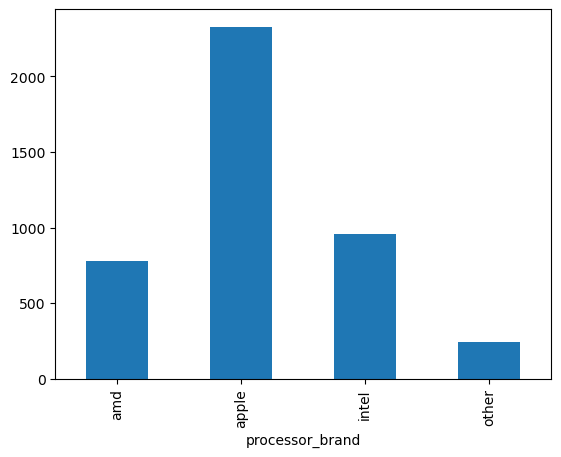

In [23]:
processor_brand_avg.plot.bar()

Take a look through some of the Pandas visualization in the documentation. How might you want to visualize the statistical value you calculated before?

https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html